<h2><center> Neural Network -Deep Neuron AI</center><h2>

In [1]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
train_dataset = MNIST(root = './', train=True, download=True, transform=transforms.ToTensor())
test_dataset= MNIST(root = './', train=False, download=True, transform=transforms.ToTensor())

'wget' is not recognized as an internal or external command,
operable program or batch file.
tar: Error opening archive: Failed to open 'MNIST.tar.gz'


100.0%


Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw



100.0%

Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw




37.8%

100.0%


Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw



100.0%

Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw



In [2]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()

In [3]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [4]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Label: 5')

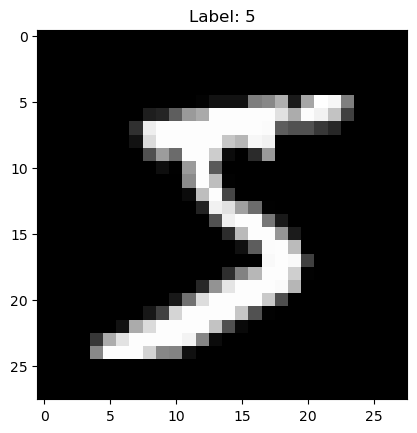

In [5]:
plt.imshow(train_dataset.data[0].numpy(), cmap='gray') # numpy(): tensor to numpy array
plt.title('Label: %i' %train_dataset.targets[0])

In [6]:
input_size = 28 * 28
hidden_size = 500
num_classes = 10
num_epoch = 5
batch_size = 100 # 每累積100筆loss 更新一次parameters
learnin_rate = 0.001

In [7]:
import torch.utils.data as Data

In [8]:
train_loader = Data.DataLoader(dataset=train_dataset, 
                               batch_size=batch_size, 
                               shuffle=True)
test_loader = Data.DataLoader(dataset=test_dataset, 
                               batch_size=batch_size, 
                               shuffle=False) # shuffle=False

In [9]:
import torch.nn as nn

In [10]:
class Model(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)
  
  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [11]:
model = Model(input_size, hidden_size, num_classes)

In [12]:
import torch.optim as opt
from torch.autograd import Variable

In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = opt.Adam(model.parameters(), lr=learnin_rate)

In [14]:
for epoch in range(num_epoch):
  for idx, (images, labels) in enumerate(train_loader):
    images = Variable(images.view(-1, 28*28))
    labels = Variable(labels)

    optimizer.zero_grad()
    outputs = model(images)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()

    if (idx+1)%100 == 0:
      print("Epoch: %d, Batch: %d, Loss: %.4f" %(epoch+1, idx+1, loss.data))

Epoch: 1, Batch: 100, Loss: 0.3420
Epoch: 1, Batch: 200, Loss: 0.2864
Epoch: 1, Batch: 300, Loss: 0.1081
Epoch: 1, Batch: 400, Loss: 0.1187
Epoch: 1, Batch: 500, Loss: 0.1679
Epoch: 1, Batch: 600, Loss: 0.0719
Epoch: 2, Batch: 100, Loss: 0.1501
Epoch: 2, Batch: 200, Loss: 0.0648
Epoch: 2, Batch: 300, Loss: 0.0589
Epoch: 2, Batch: 400, Loss: 0.0773
Epoch: 2, Batch: 500, Loss: 0.0969
Epoch: 2, Batch: 600, Loss: 0.0443
Epoch: 3, Batch: 100, Loss: 0.0632
Epoch: 3, Batch: 200, Loss: 0.0353
Epoch: 3, Batch: 300, Loss: 0.0527
Epoch: 3, Batch: 400, Loss: 0.1167
Epoch: 3, Batch: 500, Loss: 0.0453
Epoch: 3, Batch: 600, Loss: 0.0881
Epoch: 4, Batch: 100, Loss: 0.0499
Epoch: 4, Batch: 200, Loss: 0.0884
Epoch: 4, Batch: 300, Loss: 0.0655
Epoch: 4, Batch: 400, Loss: 0.0285
Epoch: 4, Batch: 500, Loss: 0.1054
Epoch: 4, Batch: 600, Loss: 0.1043
Epoch: 5, Batch: 100, Loss: 0.0169
Epoch: 5, Batch: 200, Loss: 0.0255
Epoch: 5, Batch: 300, Loss: 0.0485
Epoch: 5, Batch: 400, Loss: 0.0325
Epoch: 5, Batch: 500

In [15]:
import torch

In [16]:
correct = 0
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1, 28*28))
  labels = Variable(labels) # torch.Size([100]) batch_size
  outputs = model(images) # torch.Size([100, 10]) # batch_size, num_classes
  _, pred = torch.max(outputs.data, 1) # 1=(from) row
  
  correct += (pred == labels).sum() # 猜對量sum
  total += labels.size(0)

print('Accuracy:%.3f%%' %(100.0 * float(correct)/float(total)))

Accuracy:97.950%


In [17]:
for images, labels in test_loader:
  print(images.shape)
  print(labels.shape)
  break

torch.Size([100, 1, 28, 28])
torch.Size([100])


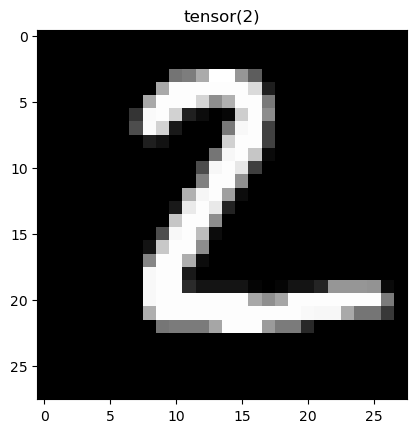

tensor([[ -7.0169,  -6.7538,  -0.8979,   2.7678, -12.5779,  -4.7192, -19.3692,
          10.9774,  -4.5664,  -3.5998],
        [ -6.6140,   1.8495,  11.8664,   0.8313, -22.0025,  -1.9603,  -7.9853,
         -16.2462,   0.4625, -17.5034]], grad_fn=<AddmmBackward0>)
tensor([7, 2])


In [18]:
plt.imshow(images[1][0].numpy(), cmap='gray') # (28*28)
plt.title(labels[1].data)
plt.show()
images_flat = Variable(images[:2].view(-1, 28*28))
outputs = model(images_flat)
print(outputs)
_, pred_y = torch.max(outputs.data, 1)
print(pred_y)

In [19]:
torch.save(model.state_dict(), "model.pkl")

In [20]:
model2 = Model(input_size, hidden_size, num_classes)
model2.load_state_dict(torch.load('model.pkl'))

<All keys matched successfully>

In [21]:
correct = 0
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1, 28*28))
  labels = Variable(labels) # torch.Size([100]) batch_size
  outputs = model2(images) # torch.Size([100, 10]) # batch_size, num_classes
  _, pred = torch.max(outputs.data, 1) # 1=(from) row
  
  correct += (pred == labels).sum() # 猜對量sum
  total += labels.size(0)

print('Accuracy:%.3f%%' %(100.0 * float(correct)/float(total)))

Accuracy:97.950%


In [22]:
torch.save(model2, 'model2.pkl')

In [23]:
model3 = torch.load('model2.pkl')

In [24]:
correct = 0
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1, 28*28))
  labels = Variable(labels) # torch.Size([100]) batch_size
  outputs = model3(images) # torch.Size([100, 10]) # batch_size, num_classes
  _, pred = torch.max(outputs.data, 1) # 1=(from) row
  
  correct += (pred == labels).sum() # 猜對量sum
  total += labels.size(0)

print('Accuracy:%.3f%%' %(100.0 * float(correct)/float(total)))

Accuracy:97.950%


In [25]:
model4 = nn.Sequential(
      nn.Linear(input_size, hidden_size),
      nn.ReLU(),
      nn.Linear(hidden_size, num_classes)
)
print(model)
print(model4)

Model(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)
Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=10, bias=True)
)


In [26]:
# optimizer = opt.SGD(model4.parameters(), lr=learnin_rate, momentum=0.5)
# optimizer = opt.Adagrad(model4.parameters(), lr=learnin_rate)
# optimizer = opt.RMSprop(model4.parameters(), lr=learnin_rate)
optimizer = opt.Adam(model4.parameters(), lr=learnin_rate, betas=(0.9, 0.999))

In [27]:
for epoch in range(num_epoch):
  for idx, (images, labels) in enumerate(train_loader):
    images = Variable(images.view(-1, 28*28))
    labels = Variable(labels)

    optimizer.zero_grad()
    outputs = model4(images)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()

    if (idx+1)%100 == 0:
      print("Epoch: %d, Batch: %d, Loss: %.4f" %(epoch+1, idx+1, loss.data))

Epoch: 1, Batch: 100, Loss: 0.2411
Epoch: 1, Batch: 200, Loss: 0.3243
Epoch: 1, Batch: 300, Loss: 0.2763
Epoch: 1, Batch: 400, Loss: 0.1475
Epoch: 1, Batch: 500, Loss: 0.2861
Epoch: 1, Batch: 600, Loss: 0.1417
Epoch: 2, Batch: 100, Loss: 0.1184
Epoch: 2, Batch: 200, Loss: 0.1121
Epoch: 2, Batch: 300, Loss: 0.1425
Epoch: 2, Batch: 400, Loss: 0.0989
Epoch: 2, Batch: 500, Loss: 0.0673
Epoch: 2, Batch: 600, Loss: 0.2183
Epoch: 3, Batch: 100, Loss: 0.0640
Epoch: 3, Batch: 200, Loss: 0.1012
Epoch: 3, Batch: 300, Loss: 0.0532
Epoch: 3, Batch: 400, Loss: 0.0650
Epoch: 3, Batch: 500, Loss: 0.0626
Epoch: 3, Batch: 600, Loss: 0.1082
Epoch: 4, Batch: 100, Loss: 0.1133
Epoch: 4, Batch: 200, Loss: 0.0750
Epoch: 4, Batch: 300, Loss: 0.0319
Epoch: 4, Batch: 400, Loss: 0.0347
Epoch: 4, Batch: 500, Loss: 0.0546
Epoch: 4, Batch: 600, Loss: 0.1431
Epoch: 5, Batch: 100, Loss: 0.0226
Epoch: 5, Batch: 200, Loss: 0.0173
Epoch: 5, Batch: 300, Loss: 0.0142
Epoch: 5, Batch: 400, Loss: 0.0466
Epoch: 5, Batch: 500